In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./Datasets/inventory_data_noisy.csv')
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [21]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [28]:
df.describe()

,Quantity,Consumption
count,18268.000000,18268.000000
mean,59.105704,12.938526
std,71.085667,13.313527
min,10.000000,5.000000
25%,32.000000,8.000000
50%,54.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


In [22]:
df.shape

(18360, 6)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18360 non-null  object 
 1   Product_ID   18360 non-null  object 
 2   Date         18360 non-null  object 
 3   Quantity     18268 non-null  float64
 4   Consumption  18268 non-null  float64
 5   Location     18176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 860.8+ KB


In [24]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

# Data Cleaning

### Dropping the Duplicates

In [31]:
df.duplicated().sum()

np.int64(349)

In [32]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(18011, 6)

### Handling Missing values

In [37]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [49]:
print(df['Quantity'].median())
print(df['Quantity'].mean())
print(df['Consumption'].median())
print(df['Consumption'].mean())

54.0
59.205652101493534
12.0
12.947643106990173


In [40]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Consumption'] = df['Consumption'].fillna(df['Consumption'].median())
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [41]:
df.isnull().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [45]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dealer_ID    18011 non-null  object        
 1   Product_ID   18011 non-null  object        
 2   Date         17609 non-null  datetime64[ns]
 3   Quantity     18011 non-null  float64       
 4   Consumption  18011 non-null  float64       
 5   Location     18011 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 985.0+ KB


### Handling Outliers

Text(0.5, 1.0, 'Outliers in Consumption')

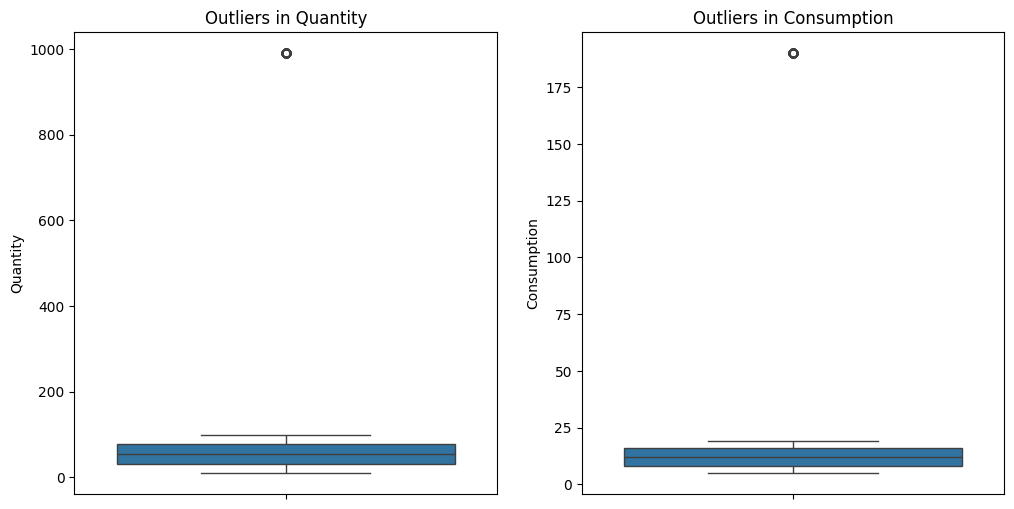

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=df,y='Quantity')
plt.title('Outliers in Quantity')
plt.subplot(122)
sns.boxplot(data=df,y='Consumption')
plt.title('Outliers in Consumption')

In [71]:
def OutlierByIQR(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    return outliers

In [72]:
OutlierByIQR('Quantity')

Index([  247,   273,   326,   820,  1397,  1453,  1981,  2021,  2146,  2184,
        2298,  2308,  2403,  2647,  2726,  2781,  2814,  2968,  3073,  3208,
        3474,  3617,  4007,  4186,  4475,  4629,  4807,  4836,  4870,  4929,
        4930,  5118,  5142,  5236,  5321,  5380,  5843,  5937,  6987,  7536,
        7839,  8072,  8903,  8985,  9422,  9605,  9620, 10137, 10201, 10228,
       10718, 10815, 10904, 11358, 11478, 11650, 11702, 11785, 12054, 12147,
       12214, 12804, 12902, 12947, 12971, 13111, 13560, 13607, 13632, 13847,
       13880, 13981, 14000, 14111, 14221, 14266, 14529, 14690, 14807, 15226,
       15272, 15735, 15792, 15824, 16365, 16535, 16699, 16803, 16973, 17437,
       17777, 17788],
      dtype='int64')

In [73]:
OutlierByIQR('Consumption')

Index([  247,   273,   326,   820,  1397,  1453,  1981,  2021,  2146,  2184,
        2298,  2308,  2403,  2647,  2726,  2781,  2814,  2968,  3073,  3208,
        3474,  3617,  4007,  4186,  4475,  4629,  4807,  4836,  4870,  4929,
        4930,  5118,  5142,  5236,  5321,  5380,  5843,  5937,  6987,  7536,
        7839,  8072,  8903,  8985,  9422,  9605,  9620, 10137, 10201, 10228,
       10718, 10815, 10904, 11358, 11478, 11650, 11702, 11785, 12054, 12147,
       12214, 12804, 12902, 12947, 12971, 13111, 13560, 13607, 13632, 13847,
       13880, 13981, 14000, 14111, 14221, 14266, 14529, 14690, 14807, 15226,
       15272, 15735, 15792, 15824, 16365, 16535, 16699, 16803, 16973, 17437,
       17777, 17788],
      dtype='int64')

In [74]:
df.drop(index=OutlierByIQR('Quantity'), inplace=True)
df.drop(index=OutlierByIQR('Consumption'), inplace=True)

In [75]:
df.shape

(17919, 6)

In [76]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,NaT,54.0,12.0,New York
18264,D001,P010,2022-01-27,26.0,18.0,Chicago
18328,D001,P014,2022-01-14,30.0,5.0,Chicago
18337,D001,P013,2022-01-26,48.0,15.0,Chicago


In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
17914,D008,P013,NaT,54.0,12.0,New York
17915,D001,P010,2022-01-27,26.0,18.0,Chicago
17916,D001,P014,2022-01-14,30.0,5.0,Chicago
17917,D001,P013,2022-01-26,48.0,15.0,Chicago


Text(0.5, 1.0, 'Consumption after removing outliers')

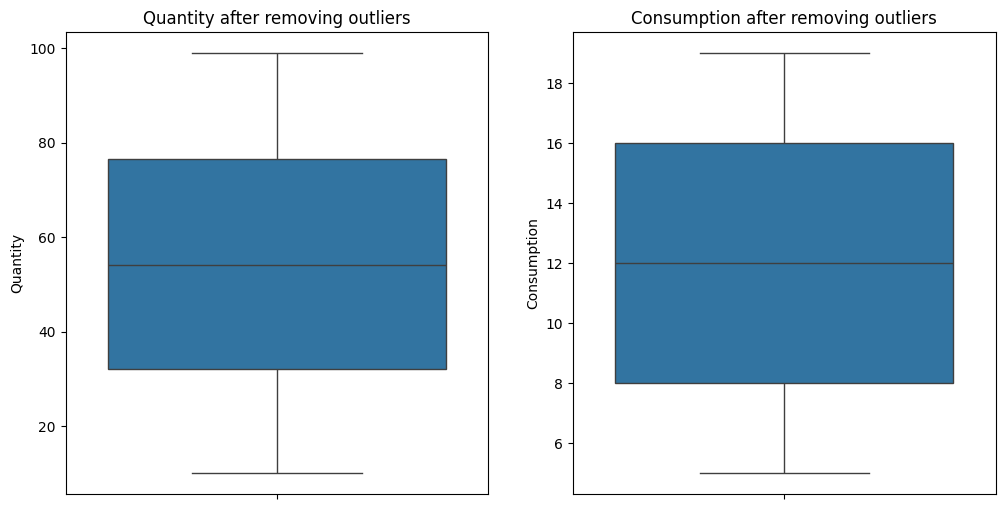

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=df,y='Quantity')
plt.title('Quantity after removing outliers')
plt.subplot(122)
sns.boxplot(data=df,y='Consumption')
plt.title('Consumption after removing outliers')

<Axes: xlabel='Location', ylabel='Count'>

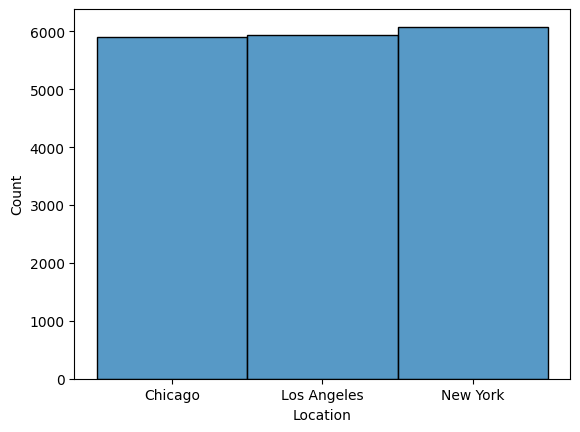

In [82]:
sns.histplot(df['Location'])

# Data Visualization

<Axes: >

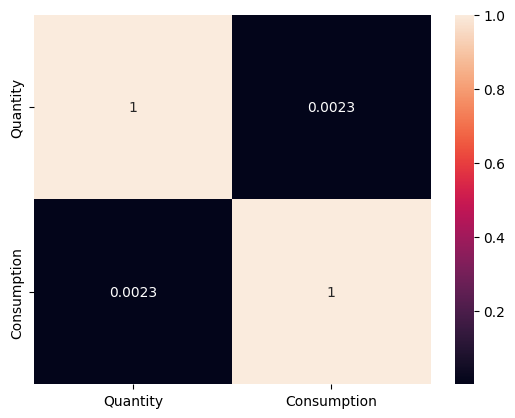

In [87]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

C:\Users\CVR\AppData\Local\Temp\ipykernel_2160\3113452681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Location', y='Consumption', palette=['Thistle', 'Teal', 'Beige'])


<Axes: xlabel='Location', ylabel='Consumption'>

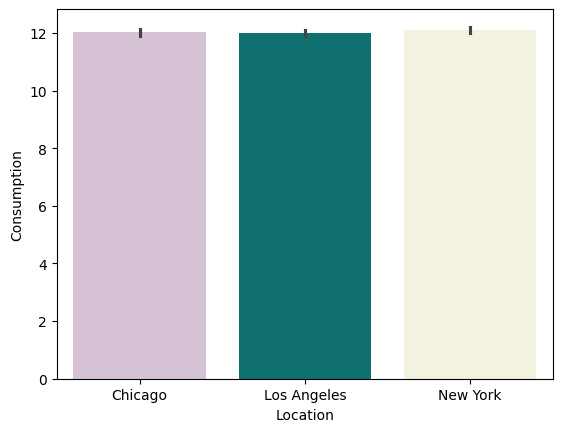

In [106]:
sns.barplot(data=df, x='Location', y='Consumption', palette=['Thistle', 'Teal', 'Beige'])

<Axes: xlabel='Consumption', ylabel='Count'>

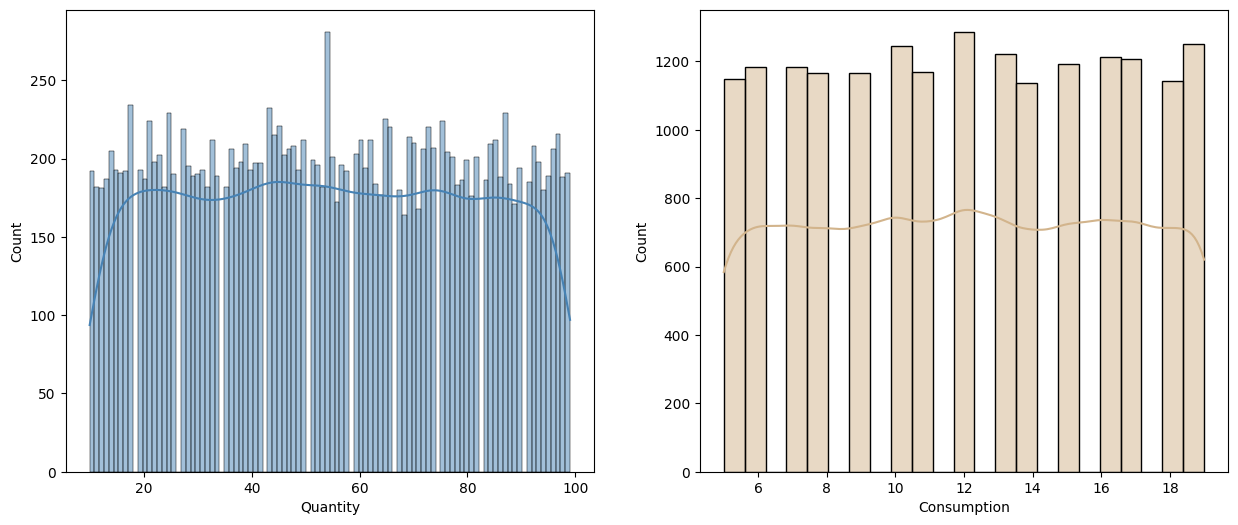

In [127]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df['Quantity'],bins=100, kde=True, color='#4682B4')
plt.subplot(122)
sns.histplot(df['Consumption'], kde=True, color='#D2B48C')

<Axes: xlabel='Date', ylabel='Quantity'>

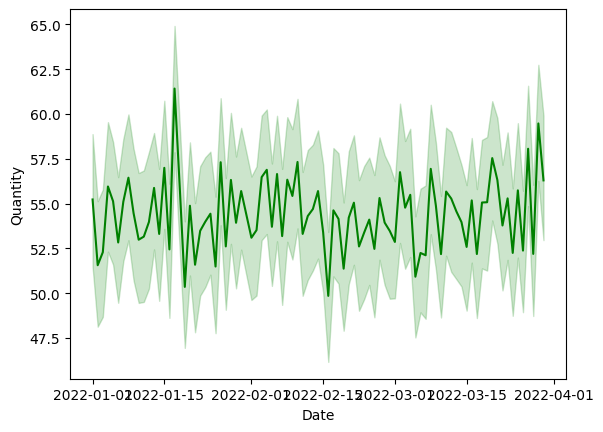

In [122]:
sns.lineplot(data=df, x='Date', y='Quantity', color='green')

<Axes: xlabel='Date', ylabel='Consumption'>

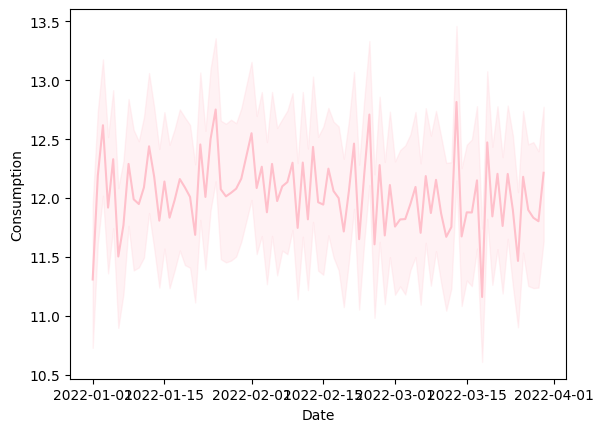

In [123]:
sns.lineplot(data=df, x='Date', y='Consumption', color='pink')

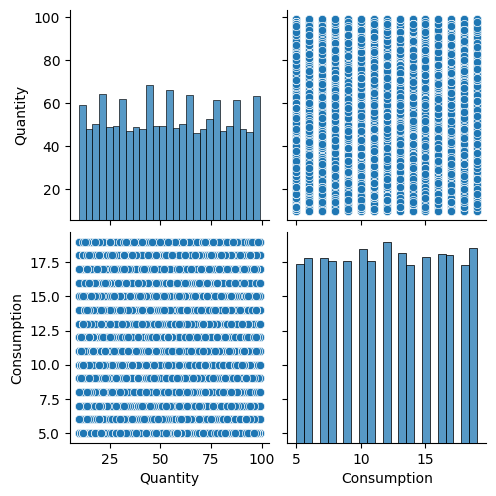

In [128]:
sns.pairplot(df[['Quantity', 'Consumption']])